In [12]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('../data/checking-logs.sqlite')

In [13]:
query = """
SELECT timestamp, uid, numTrials
FROM checker
WHERE uid LIKE 'user_%'
  AND status = 'ready'
  AND labname = 'project1'
ORDER BY timestamp
"""

df = pd.io.sql.read_sql(query, conn)

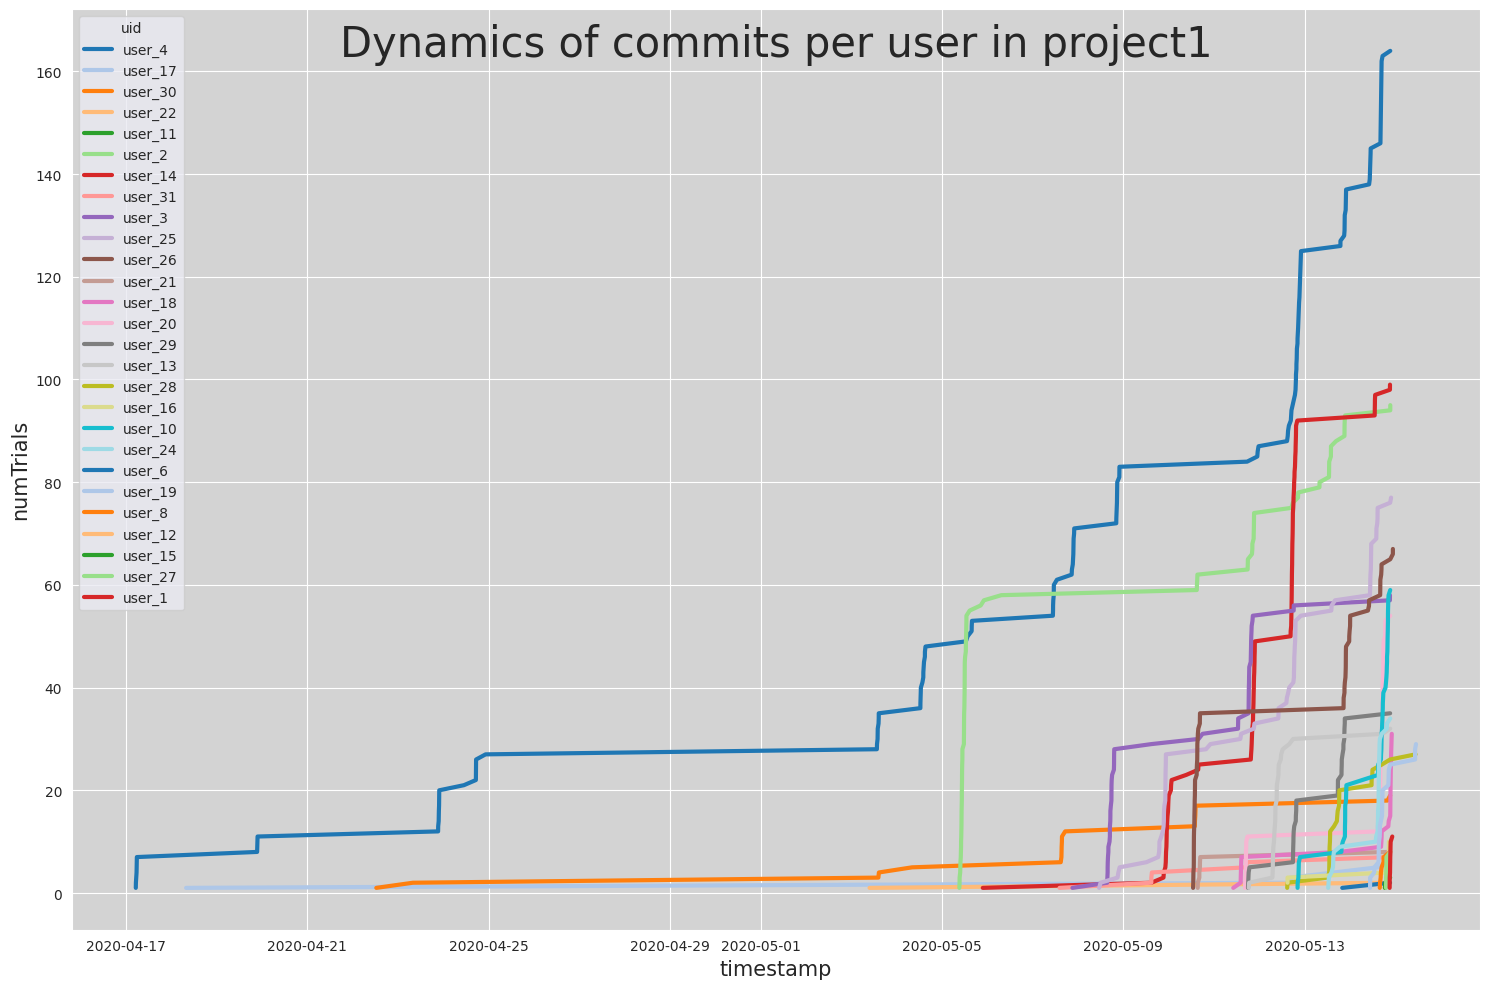

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))

plot = sns.lineplot(
    data=df,
    x='timestamp',
    y='numTrials',
    hue='uid',
    palette='tab20',
    linewidth=3
)

plt.gca().set_facecolor('lightgray')
plot.set_title('Dynamics of commits per user in project1', fontsize=30, y=0.94)
plot.set_xlabel('timestamp', fontsize=15)
plot.set_ylabel('numTrials', fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
conn.close()

Which user was the leader in the number of commits almost all of the time? The answer: user_4.
Which user was the leader for only a short period of time? The answer: user_2